In [11]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as mp
%matplotlib inline

In [12]:
dataset = {
'Points':['P1','P2','P3','P4','P5','P6','P7','P8',],
'x_coordinate':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
'y_coordinate':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]
}

In [13]:
df = pd.DataFrame(dataset,columns=['Points','x_coordinate','y_coordinate'])

In [14]:
df.head(8)

,Points,x_coordinate,y_coordinate
0,P1,0.10,0.60
1,P2,0.15,0.71
2,P3,0.08,0.90
3,P4,0.16,0.85
4,P5,0.20,0.30
5,P6,0.25,0.50
6,P7,0.24,0.10
7,P8,0.30,0.20


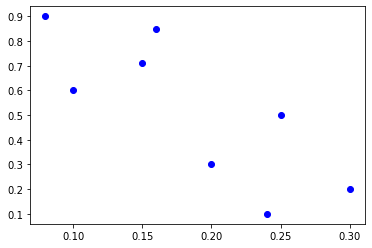

In [15]:
a1=df['x_coordinate'].values
b1=df['y_coordinate'].values
arr=np.array(list(zip(a1,b1)))
mp.scatter(a1,b1,color='blue')

In [16]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [18]:
k=2
c1=list(arr[0])
c2=list(arr[7])
centro=np.array([c1,c2])
print(centro)

[[0.1 0.6]
 [0.3 0.2]]


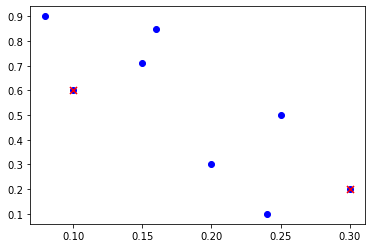

In [20]:
mp.scatter(a1,b1,color='blue')
mp.scatter(c1[0],c1[1],marker='x', s=50,c='r')
mp.scatter(c2[0],c2[1],marker='x', s=50,c='r')

In [23]:
C_old = np.zeros(centro.shape)
clusters = np.zeros(len(arr))
error = dist(centro, C_old, None)
while error != 0:
    for i in range(len(arr)):
        distances = dist(arr[i], centro)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(centro)
    print(C_old)
    for i in range(k):
        points = [arr[j] for j in range(len(arr)) if clusters[j] == i]
        centro[i] = np.mean(points, axis=0)
        print(centro[i])
    error = dist(centro, C_old, None)

[[0.1 0.6]
 [0.3 0.2]]
[0.148 0.712]
[0.24666667 0.2       ]
[[0.148      0.712     ]
 [0.24666667 0.2       ]]
[0.148 0.712]
[0.24666667 0.2       ]


New centroids are : 
[0.148 0.712]
[0.24666667 0.2       ]
-----------
For centroid 0
[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]
 [0.25 0.5 ]]
For centroid 1
[[0.2  0.3 ]
 [0.24 0.1 ]
 [0.3  0.2 ]]


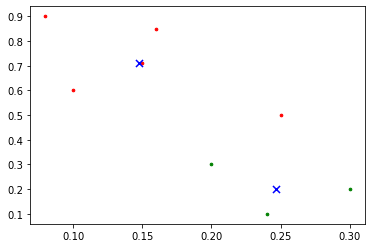

In [27]:
colors = ['r', 'g']
fig, ax = mp.subplots()
print("New centroids are : ")
print(centro[0])
print(centro[1])
print("-----------")
for i in range(k):
        points = np.array([arr[j] for j in range(len(arr)) if clusters[j] == i])
        print("For centroid",i)
        print(points)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

mp.scatter(centro[:, 0], centro[:, 1], marker='x', s=50, c='blue')